In [2]:
# @title Importing the dataset

import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# @title Spliting the data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [4]:
# @title Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train[:, :1] = sc.fit_transform(X_train[:, :1])
X_train[:, -1:] = sc.transform(X_train[:, -1:])

X_test[:, :1] = sc.transform(X_test[:, :1])
X_test[:, -1:] = sc.transform(X_test[:, -1:])

In [5]:
# @title Training the training set

# K-Nearest Neighbour (0.873)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Random Forest (0.869)
'''
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0, n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)
'''

# Logistic Regression (0.781)
'''
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight = 'balanced')
classifier.fit(X_train, y_train)
'''

# Decision Tree (0.764)
'''
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
'''

"\nfrom sklearn.tree import DecisionTreeClassifier\nclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)\nclassifier.fit(X_train, y_train)\n"

In [6]:
# @title Predicting for a single value

to_pred = [
    [0,
     -1.3598071336738,
     -0.0727811733098497,
     2.53634673796914,
     1.37815522427443,
     -0.338320769942518,
     0.462387777762292,
     0.239598554061257,
     0.0986979012610507,
     0.363786969611213,
     0.0907941719789316,
     -0.551599533260813,
     -0.617800855762348,
     -0.991389847235408,
     -0.311169353699879,
     1.46817697209427,
     -0.470400525259478,
     0.207971241929242,
     0.0257905801985591,
     0.403992960255733,
     0.251412098239705,
     -0.018306777944153,
     0.277837575558899,
     -0.110473910188767,
     0.0669280749146731,
     0.128539358273528,
     -0.189114843888824,
     0.133558376740387,
     -0.0210530534538215,
     149.62]
]

to_pred = np.array(to_pred).reshape(1, -1)

to_pred[:, :1] = sc.transform(to_pred[:, :1])
to_pred[:, -1:] = sc.transform(to_pred[:, -1:])

classifier.predict(to_pred)

array([0])

In [7]:
# @title Predicting the Test set results

# y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

y_pred_proba = classifier.predict_proba(X_test)

In [8]:
# @title Area Under curve
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
auprc = auc(recall, precision)
print(auprc)

0.87399406884923


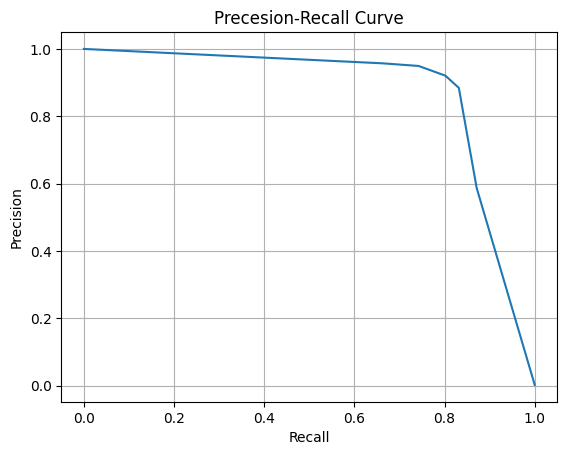

In [9]:
# @title Plot the Precision-Recall curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precesion-Recall Curve')
plt.grid(True)
plt.show()